In [1]:
import nltk
import matplotlib.pyplot as plt
import pandas as pd
#from sklearn.feature_extraction.text import CountVectorizer ## TEST
from sklearn.feature_extraction.text import TfidfVectorizer ## TEST
from sklearn.feature_extraction.text import TfidfTransformer
#from nltk.probability import FreqDist
from nltk.corpus import stopwords ## TEST
from nltk.stem import PorterStemmer
from sklearn.metrics import confusion_matrix
import seaborn as sns
from sklearn.naive_bayes import MultinomialNB
from sklearn import metrics
from sklearn.model_selection import train_test_split
from matplotlib import cm
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.naive_bayes import MultinomialNB


In [2]:
from sklearn.metrics import confusion_matrix
import seaborn as sns; sns.set()

In [3]:
#loading in cleaned data for analysis
X_lem = pd.read_pickle('modeling/X_lem.pkl')
y_lem = pd.read_pickle('modeling/y_lem.pkl')

#loading stop word list
sw_list = pd.read_pickle('modeling/stopwords.pkl')

In [4]:
X_lem[0]

'leader sector tackle toughest challenge grow startup improve early education quickly enter market serve organization size ranging smalltomidsized revenue le year top forbes list office practice eight functional practice private sector serve government weve completed project social sector organization last five mean whatever passion find others working similar topic mckinsey know want know want come mckinsey explore visit career website learn apply subscribe career blog weekly job alert story colleague twofold distinctive lasting substantial improvement performance build firm attracts develops excites retains exceptional element strongly connected helping solve toughest problem requires drawn matter together supportive dedicated colleague'

## Baseline Random Forest
- Random Forest with Lemmatization, trigrams
- **try also with BoW instead of TF-IDF??**
- **try also with Stemming instead of Lemmatization??** 

Results before additional preprocessing:
- Testing Accuracy: 0.5441
- Testing Precision: 0.5703
- Testing Recall: 0.6881
- F1 Score: 0.6237
- ngram_range=(1,3)

*Train-Test Split*

In [5]:
# always train-test split THEN apply vectorizer 
X_train_lem, X_test_lem, y_train_lem, y_test_lem = train_test_split(X_lem, y_lem, test_size=0.20, random_state=42)


In [6]:
null_accuracy = round(y_test_lem.value_counts()[0]/y_test_lem.value_counts().sum(), 4)
print('NOTE: Null Accuracy is', null_accuracy)

NOTE: Null Accuracy is 0.4296


*Vectorize*

In [7]:
#Vectorize Test Set
tfidf = TfidfVectorizer(stop_words=sw_list, ngram_range=(1,3)) ## TEST bigram/trigram

#fit vectorizer to both training and testing set
tfidf_data_train_lem = tfidf.fit_transform(X_train_lem)
tfidf_data_test_lem = tfidf.transform(X_test_lem)

*Model*

In [8]:
rf_classifier_lem = RandomForestClassifier(n_estimators=120, random_state=42)

In [9]:
# rf_classifier_lem = RandomForestClassifier(n_estimators=100, 
#                                            max_depth=35, 
#                                            max_features=2, 
#                                            min_samples_leaf=1,
#                                            min_samples_split=10, 
#                                            random_state=42)

In [10]:
## Fit model to train set
rf_classifier_lem.fit(tfidf_data_train_lem, y_train_lem)

# Predictions
rf_test_preds_lem = rf_classifier_lem.predict(tfidf_data_test_lem)
rf_train_preds_lem = rf_classifier_lem.predict(tfidf_data_train_lem)

*Evaluate Metrics*

In [11]:
#(ngram=1,3)
rf_acc_score_lem = accuracy_score(y_test_lem, rf_test_preds_lem)
rf_precision_score_lem = metrics.precision_score(y_test_lem, rf_test_preds_lem)
rf_recall_score_lem = metrics.recall_score(y_test_lem, rf_test_preds_lem)
rf_f1_score_lem = f1_score(y_test_lem, rf_test_preds_lem)

print('Random Forest with Lemmatization Features:\n')
print("Testing Accuracy: {:.4}".format(rf_acc_score_lem))
# print("Testing Precision: {:.4}".format(rf_precision_score_lem))
# print("Testing Recall: {:.4}".format(rf_recall_score_lem))
print("F1 Score: {:.4}".format(rf_f1_score_lem))

rf_train_accuracy = accuracy_score(y_train_lem, rf_train_preds_lem)
print("Training Accuracy: {:.4}".format(rf_train_accuracy))

Random Forest with Lemmatization Features:

Testing Accuracy: 0.5211
F1 Score: 0.5916
Training Accuracy: 1.0


(2.0, 0.0)

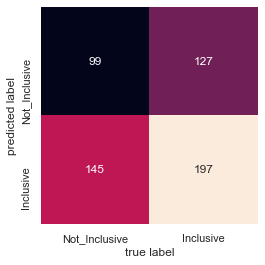

In [12]:
from sklearn.metrics import confusion_matrix
import seaborn as sns; sns.set()


mat = confusion_matrix(y_test_lem, rf_test_preds_lem)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False,
            xticklabels=['Not_Inclusive', 'Inclusive'], 
            yticklabels=['Not_Inclusive', 'Inclusive']
           )
plt.xlabel('true label')
plt.ylabel('predicted label');

## Fixing cut-off bug
b, t = plt.ylim() # discover the values for bottom and top
b += 0.5 # Add 0.5 to the bottom
t -= 0.5 # Subtract 0.5 from the top
plt.ylim(b, t) # update the ylim(bottom, top) values

## Baseline Logistic Regression

- Testing Accuracy: 0.5768
- Testing Precision: 0.5702
- Testing Recall: 0.9312
- F1 Score: 0.7073

- ngram_range=(1,3)


overfit - why??

In [13]:
# Train-test split
X_train_lem, X_test_lem, y_train_lem, y_test_lem = train_test_split(X_lem, y_lem, test_size=0.20, random_state=42)


**Vectorize**

In [14]:
# Vectorize Test Set
tfidf = TfidfVectorizer(stop_words=sw_list, ngram_range=(1,3))

#fit vectorizer to both training and testing set
tfidf_data_train_lem = tfidf.fit_transform(X_train_lem)
tfidf_data_test_lem = tfidf.transform(X_test_lem)

In [15]:
## Run below code to perform a grid search of optimal parameters
# from sklearn.model_selection import train_test_split, GridSearchCV

# log_reg = LogisticRegression()
# log_param_grid = {
#     'C' : [40,45,50,55,60],
#     'penalty': ['l1', 'l2']
# }

# log_grid_search = GridSearchCV(log_reg, log_param_grid, cv=3, verbose=True, n_jobs=-1)
# log_grid_search.fit(tfidf_data_train_lem, y_train_lem)

# print(log_grid_search.best_params_) 
# print(log_grid_search.best_score_)

Best parameters according to gridsearch: {'C': 50, 'penalty': 'l2'}
0.5719

**Model**

In [16]:
from sklearn.linear_model import LogisticRegression

###work with c= (bigger number = less regulization), check out solver
log_reg_baseline = LogisticRegression(C=50,
                                      random_state=42)

In [17]:
#fit model to train set
log_reg_baseline.fit(tfidf_data_train_lem, y_train_lem)

#predictions
log_reg_test_preds = log_reg_baseline.predict(tfidf_data_test_lem)
log_reg_train_preds = log_reg_baseline.predict(tfidf_data_train_lem)

**Resulting Metrics**

In [18]:
log_reg_accuracy = accuracy_score(y_test_lem, log_reg_test_preds)
log_reg_precision = metrics.precision_score(y_test_lem, log_reg_test_preds)
log_reg_recall = metrics.recall_score(y_test_lem, log_reg_test_preds)
log_reg_f1 = f1_score(y_test_lem, log_reg_test_preds)


# printing scores
print('Logistic Regression with Lemmatization Features:\n')
print("Testing Accuracy: {:.4}".format(log_reg_accuracy))
# print("Testing Precision: {:.4}".format(log_reg_precision))
# print("Testing Recall: {:.4}".format(log_reg_recall))
print("F1 Score: {:.4}".format(log_reg_f1))

print()
log_train_accuracy = accuracy_score(y_train_lem, log_reg_train_preds)
print("Training Accuracy: {:.4}".format(log_train_accuracy))

Logistic Regression with Lemmatization Features:

Testing Accuracy: 0.5405
F1 Score: 0.619

Training Accuracy: 1.0


(2.0, 0.0)

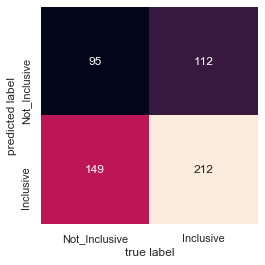

In [19]:
from sklearn.metrics import confusion_matrix
import seaborn as sns; sns.set()


mat = confusion_matrix(y_test_lem, log_reg_test_preds)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False,
            xticklabels=['Not_Inclusive', 'Inclusive'], 
            yticklabels=['Not_Inclusive', 'Inclusive']
           )
plt.xlabel('true label')
plt.ylabel('predicted label');

## Fixing cut-off bug
b, t = plt.ylim() # discover the values for bottom and top
b += 0.5 # Add 0.5 to the bottom
t -= 0.5 # Subtract 0.5 from the top
plt.ylim(b, t) # update the ylim(bottom, top) values

## Naive Bayes
Naive Bayes with Lemmatization Features:

- Testing Accuracy: 0.5888
- F1 Score: 0.7305

- Training Accuracy: 0.7787

In [20]:
# Train-test split
X_train_lem, X_test_lem, y_train_lem, y_test_lem = train_test_split(X_lem, y_lem, test_size=0.20, random_state=42)


**Vectorize**

In [21]:
# Vectorize Test Set
tfidf = TfidfVectorizer(stop_words=sw_list)

#fit vectorizer to both training and testing set
tfidf_data_train_lem = tfidf.fit_transform(X_train_lem)
tfidf_data_test_lem = tfidf.transform(X_test_lem)

**Model**

In [22]:
# Instantiate and fit model:
nb_classifier = MultinomialNB()
nb_classifier.fit(tfidf_data_train_lem, y_train_lem)

# Predictions:
nb_train_preds = nb_classifier.predict(tfidf_data_train_lem)
nb_test_preds = nb_classifier.predict(tfidf_data_test_lem)

**Resulting Metrics**

In [23]:
nb_accuracy = accuracy_score(y_test_lem, nb_test_preds)
nb_precision = metrics.precision_score(y_test_lem, nb_test_preds)
nb_recall = metrics.recall_score(y_test_lem, nb_test_preds)
nb_f1 = f1_score(y_test_lem, nb_test_preds)

nb_train_accuracy = accuracy_score(y_train_lem, nb_train_preds)

# printing scores
print('Naive Bayes with Lemmatization Features:\n')
print("Testing Accuracy: {:.4}".format(nb_accuracy))
# print("Testing Precision: {:.4}".format(nb_precision))
# print("Testing Recall: {:.4}".format(nb_recall))
print("F1 Score: {:.4}".format(nb_f1))
print()
print("Training Accuracy: {:.4}".format(nb_train_accuracy))

Naive Bayes with Lemmatization Features:

Testing Accuracy: 0.5722
F1 Score: 0.7216

Training Accuracy: 0.7834


(2.0, 0.0)

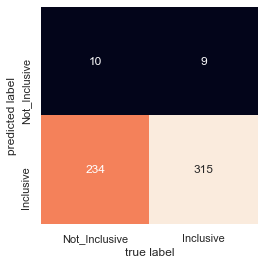

In [24]:
# Confusion matrix
mat = confusion_matrix(y_test_lem, nb_test_preds)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False,
            xticklabels=['Not_Inclusive', 'Inclusive'], 
            yticklabels=['Not_Inclusive', 'Inclusive']
           )
plt.xlabel('true label')
plt.ylabel('predicted label');

## Fixing cut-off bug
b, t = plt.ylim() # discover the values for bottom and top
b += 0.5 # Add 0.5 to the bottom
t -= 0.5 # Subtract 0.5 from the top
plt.ylim(b, t) # update the ylim(bottom, top) values

## Next Model?

## LSTM

In [35]:
###!pip install tensorflow
#!pip install keras

In [36]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

In [37]:
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, LSTM#, CuDNNLSTM
from keras.optimizers import Adam

In [38]:
# Train-test split
X_train_lem, X_test_lem, y_train_lem, y_test_lem = train_test_split(X_lem, y_lem, test_size=0.20, random_state=42)


In [39]:
# # Vectorize Test Set
# tfidf = TfidfVectorizer(stop_words=sw_list)

# #fit vectorizer to both training and testing set
# tfidf_data_train_lem = tfidf.fit_transform(X_train_lem)
# tfidf_data_test_lem = tfidf.transform(X_test_lem)

In [40]:
# #Initializing the classifier Network
# sq = Sequential()

# #Adding the input LSTM network layer
# sq.add(LSTM(128, input_shape=(X_train_lem.shape[1:]), return_sequences=True))###
# sq.add(Dropout(0.2))

In [41]:
# #Adding a second LSTM network layer
# sq.add(LSTM(128))

# #Adding a dense hidden layer
# sq.add(Dense(64, activation='relu'))
# sq.add(Dropout(0.2))

# #Adding the output layer
# sq.add(Dense(10, activation='softmax'))

In [42]:
# #Compiling the network
# sq.compile( loss='sparse_categorical_crossentropy',
#               optimizer=Adam(lr=0.001, decay=1e-6),
#               metrics=['accuracy'] )

# #Fitting the data to the model
# sq.fit(X_train_lem,
#          y_train_lem,
#           epochs=3,
#           validation_data=(X_test_lem, y_test_lem))

In [43]:
# test_loss, test_acc = sq.evaluate(X_test_lem, y_test_lem)
# print('Test Loss: {}'.format(test_loss))
# print('Test Accuracy: {}'.format(test_acc))

## LSTM - 2

In [44]:
#! pip install gensim

In [45]:
import pandas as pd
import numpy as np

from gensim.models import Word2Vec
from nltk import word_tokenize

In [46]:
# loading in data
data_clean = pd.read_pickle('modeling/data_clean.pkl')

In [47]:
X_nn = data_clean.apply(lambda x: word_tokenize(x))

In [48]:
# Train-test split
X_train_nn, X_test_nn, y_train_nn, y_test_nn = train_test_split(X_nn, y_lem, test_size=0.20, random_state=42)


In [49]:
# Vectorize Test Set
tfidf = TfidfVectorizer(stop_words=sw_list)

#fit vectorizer to both training and testing set
tfidf_data_train_lem = tfidf.fit_transform(X_train_lem)
tfidf_data_test_lem = tfidf.transform(X_test_lem)

In [50]:
#Create a Word2Vec model
model = Word2Vec(X_test_nn, size=100, window=5, min_count=1, workers=4)

In [51]:
model.train(X_test_nn, total_examples=model.corpus_count, epochs=3) #try 10

(167960, 211287)

In [52]:
X_test_nn

415     [westinghouse, electric, company, is, the, wor...
1302    [capital, health, system, chs, serves, the, re...
2475    [we, believe, that, every, business, should, p...
1340    [arcadis, is, the, leading, global, design, co...
1599    [since, it, launched, in, brooklyn, ny, in, we...
                              ...                        
163     [amdocs, is, leader, in, one, of, the, world, ...
1926    [at, mcadam, weve, completely, reinvented, the...
252     [drive, solutions, software, and, innovations,...
1779    [lord, corporation, is, diversified, technolog...
1405    [akzonobel, creates, everyday, essentials, to,...
Name: CLEAN_DESCRIPTION, Length: 568, dtype: object

In [53]:
wv = model.wv

In [54]:

# get the data paths
train_path = y_test_nn
#valid_path = os.path.join(data_path, "ptb.valid.txt")
test_path = X_test_nn

In [55]:
# #Initializing the classifier Network
# sq = Sequential()

# #Adding the input LSTM network layer
# sq.add(LSTM(128, input_shape=(X_train_nn.shape[1:]), return_sequences=True))###
# sq.add(Dropout(0.2))

In [56]:
# #Adding a second LSTM network layer
# sq.add(LSTM(128))

# #Adding a dense hidden layer
# sq.add(Dense(64, activation='relu'))
# sq.add(Dropout(0.2))

# #Adding the output layer
# sq.add(Dense(10, activation='softmax'))

In [57]:
# #Compiling the network
# sq.compile( loss='sparse_categorical_crossentropy',
#               optimizer=Adam(lr=0.001, decay=1e-6),
#               metrics=['accuracy'] )

# #Fitting the data to the model
# sq.fit(X_train_lem,
#          y_train_lem,
#           epochs=3,
#           validation_data=(X_test_lem, y_test_lem))

In [58]:
# test_loss, test_acc = sq.evaluate(X_test_lem, y_test_lem)
# print('Test Loss: {}'.format(test_loss))
# print('Test Accuracy: {}'.format(test_acc))

## NOTES

In [59]:
### Code to look at all metrics together
# nb_train_score = accuracy_score(target, nb_train_preds)
# nb_test_score = accuracy_score(newsgroups_test.target, nb_test_preds)
# rf_train_score = accuracy_score(target, rf_train_preds)
# rf_test_score = accuracy_score(newsgroups_test.target, rf_test_preds)

# print("Multinomial Naive Bayes")
# print("Training Accuracy: {:.4} \t\t Testing Accuracy: {:.4}".format(nb_train_score, nb_test_score))
# print("")
# print('-'*70)
# print("")
# print('Random Forest')
# print("Training Accuracy: {:.4} \t\t Testing Accuracy: {:.4}".format(rf_train_score, rf_test_score))